In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import my class Circle
from Circle import Circle

sigma_1 = 1291 kPa, sigma_3 = 365 kPa
On plane AE, Normal traction = 414 kPa, shear traction = 207 kPa


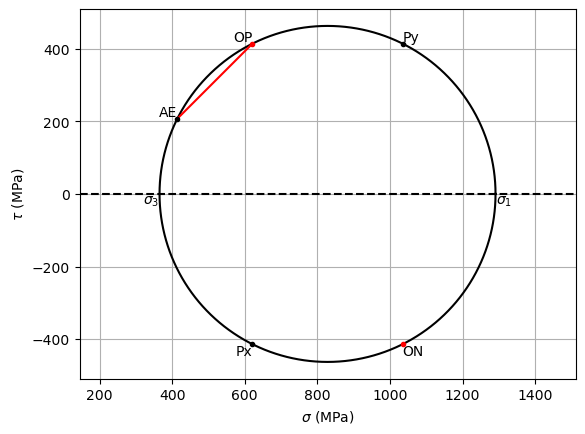

In [2]:
# Example 3 in folelesning 8
# tractions
sxx = 621
sxy = -414 # clockwise
syy = 1035
syx = 414 # anticlockwise

# construct Mohr Circle
circle = Circle([0,0], 1)
points = np.array([[sxx,sxy],[syy,syx],[syy,sxy]])
circle.fit_three_points(points)
x,y = circle.coordinates()

# sigma1 and sigma3 values
sigma_1 = circle.center[0] + circle.radius
sigma_3 = circle.center[0] - circle.radius
print(f"sigma_1 = {sigma_1:.0f} kPa, sigma_3 = {sigma_3:.0f} kPa")

# find the pole to normals
pole_normals = circle.chord_endpoint([sxx,sxy], np.radians(180))
# find the pole to planes (Ragan, 2009)
pole_planes = circle.chord_endpoint([sxx,sxy], np.radians(90)) 
# find the tractions on plane AE
tractions = circle.chord_endpoint(pole_planes, np.radians(225))
chord_p = np.array([pole_planes, tractions])
print(f"On plane AE, Normal traction = {tractions[0]:.0f} kPa, shear traction = {tractions[1]:.0f} kPa")

# plot Mohr Circle
fig, ax = plt.subplots()
# circle
ax.plot(x, y, "k")
# sigma_1 and sigma_3 labels
ax.text(sigma_1, 0, r"$\sigma_1$", ha="left", va="top")
ax.text(sigma_3, 0, r"$\sigma_3$", ha="right", va="top")
# planes
ax.plot(sxx, sxy, "k.")
ax.text(sxx, sxy, "Px", ha="right", va="top")
ax.plot(syy, syx, "k.")
ax.text(syy, syx, "Py", ha="left", va="bottom")
# poles
ax.plot(pole_normals[0], pole_normals[1], "r.")
ax.text(pole_normals[0], pole_normals[1], "ON", ha="left", va="top")
ax.plot(pole_planes[0], pole_planes[1], "r.")
ax.text(pole_planes[0], pole_planes[1], "OP", ha="right", va="bottom")
# tractions on plane AE
ax.plot(chord_p[:,0],chord_p[:,1],"r-")
ax.plot(tractions[0],tractions[1],"k.")
ax.text(tractions[0],tractions[1],"AE", ha="right", va="bottom")

# grid
ax.grid()
# horizontal line at tau = 0
ax.axhline(0,color="k",linestyle="--")
# axes labels
ax.set_xlabel(r"$\sigma$ (MPa)")
ax.set_ylabel(r"$\tau$ (MPa)")
# axes equal
ax.axis("equal")

plt.show()